In [1]:
import numpy as np
import pandas as pd

**Load data**

In [2]:
ltc = pd.read_csv('../data/bc_ltc_final.csv')
odhf = pd.read_excel('../data/odhf_ltc.xlsx')

In [3]:
ltc[ltc.latitude.isnull()]

,FACILITY_NAME,Number of dead,HCC_CODE,HLTH_AUTH,STREET_ADDRESS,CITY,POSTAL,PHONE,OPEN_DATE,COUNCIL,...,outbreak_status,location,point,latitude,longitude,residents_council,family_council,accreditation,home_type,years_operating
0,Langley Lodge,26.0,98JIE,Fraser Health,5451-204th St,Langley,V3A5M9,(604) 530-2305,1974,"Resident Council, Family Council",...,yes,NaN,NaN,NaN,NaN,yes,yes,yes,non-profit,46.0
4,Royal Arch Masonic Home,12.0,9AAG7,Vancouver Coastal Health,7850 Champlain Cresc,Vancouver,V5S4C7,(604) 437-7343,1982,"Resident Council, Family Council",...,yes,NaN,NaN,NaN,NaN,yes,yes,no,non-profit,38.0
10,The Residence at Clayton Heights,2.0,93CAA,Fraser Health,18788 71st Avenue,Surrey,V4N6L9,(604) 576-2273,2012,Resident Council,...,yes,NaN,NaN,NaN,NaN,yes,no,no,for-profit,8.0
16,Acacia Ty Mawr,0.0,99549,Vancouver Island Health,2655 E Shawnigan Lake Rd,Shawnigan Lake,V0R2W0,(250) 743-2124,1990,Family Council,...,no,NaN,NaN,NaN,NaN,no,yes,yes,for-profit,30.0
21,Arrowsmith Lodge,0.0,995A3,Vancouver Island Health,266 Moilliet St,Parksville,V9P1M9,(250) 248-4331,2005,"Resident Council, Family Council",...,no,NaN,NaN,NaN,NaN,yes,yes,yes,non-profit,15.0
45,CareLife Fleetwood,0.0,9A5AD,Fraser Health,8265 159th Street,Surrey,V4N5T5,(604) 598-7200,2008,Resident Council,...,no,NaN,NaN,NaN,NaN,yes,no,unknown,health_authority,12.0
46,Cariboo Place,0.0,93GGE,Interior Health,185 Fourth Ave N,Williams Lake,V2G2C8,(778) 417-0275,2019,Resident & Family Council (combined),...,no,NaN,NaN,NaN,NaN,yes,yes,yes,for-profit,1.0
52,Cerwydden Seniors Community,0.0,9244A,Vancouver Island Health,3243 Cowichan Lake R,Duncan,V9L4B8,(250) 746-4432,2000,"Resident Council, Family Council",...,no,NaN,NaN,NaN,NaN,yes,yes,unknown,for-profit,20.0
55,Chetwynd Hospital and Health Centre,0.0,922CD,Northern Health,5500 Hospital road,Chetwynd,V0C1J0,(250) 788-2236,1971,No Councils,...,no,NaN,NaN,NaN,NaN,no,no,yes,health_authority,49.0
57,Columbia Garden Village,0.0,93DHA,Interior Health,"800-10 Ave., Box 578",Invermere,V0A1K0,(250) 341-3350,2005,Resident Council,...,no,NaN,NaN,NaN,NaN,yes,no,yes,for-profit,15.0


In [4]:
odhf_bc = odhf[odhf['province'] == 'bc']

In [5]:
odhf_bc.columns

Index(['index', 'facility_name', 'source_facility_type', 'odhf_facility_type',
       'provider', 'unit', 'street_no', 'street_name', 'postal_code', 'city',
       'province', 'source_format_str_address', 'CSDname', 'CSDuid', 'Pruid',
       'latitude', 'longitude'],
      dtype='object')

In [6]:
ltc['facility_name'] = ltc.FACILITY_NAME.str.lower()

**Correct some name discrepancies in odhf**

In [7]:
def rightsplit(x):
    hold = x.split('ó')
    try:
        return hold[1].lstrip()
    except IndexError:
        return hold[0]
    
    
odhf_bc['facility_name'] = odhf_bc.facility_name.map(lambda x: rightsplit(x))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
odhf_bc.facility_name

115                 harmony court care centre
116                              echo village
117                          fir park village
118                           all care canada
119                  amherst private hospital
                        ...                  
305                            westview place
306                        william rudd house
307                    willingdon care centre
308    wrinch memorial hospital extended care
309                    yaletown house society
Name: facility_name, Length: 195, dtype: object

**Merge**

In [9]:
ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'outer')

In [10]:
print("merge: {}, odhf_bc: {}, ltc: {}".format(len(ltc_odhf), len(odhf_bc), len(ltc)))

merge: 379, odhf_bc: 195, ltc: 297


**How many facilities are in odhf are not in the ltc data?**

In [11]:
missing = list(set(odhf_bc.facility_name.unique()) - set(ltc.facility_name.unique()))
len(missing)

82

**How many facilities are in the ltc csv are not in the odhf?**

In [12]:
missing2 = list(set(ltc.facility_name.unique()) - set(odhf_bc.facility_name.unique()))
len(missing2)
# missing2

184

In [13]:
odhf_bc.facility_name.replace({'bradley centre': 'bradley center',
                             'parkview place enderby': 'parkview place',
                             'dr. andrew pavilion' : 'dr. andrew pavilion - summerland health centre',
                             'priory (hiscock & heritage woods)' : 'the priory - heritage woods',
                              'st vincentís: brock fahrni' : 'st. vincent\'s - brock fahrni pavilion',
                              'pine grove care centre' : 'pine grove seniors community',
                             'the views' : 'the views - st. joseph\'s general hospital',
                             'fort langley seniors village' : 'fort langley seniors community',
                             'selkirk place' : 'selkirk seniors village',
                             'kiwanis lodge' : 'kiwanis village lodge',
                             'brandtís creek mews' : 'brandt\'s creek mews',
                              'hilton villa care centre' : 'hilton villa seniors community',
                              'bevan lodge' : 'bevan village',
                              'discovery harbour care centre' : 'discovery harbour seniors community',
                              'the cascades' : 'the cascades care community',
                             'eagle park health care centre': 'eagle park health care facility',
                             'cottage-worthington pavilion' : 'cottage and worthington pavilions - msa hospital',
                             'evergreen baptist care home' : 'evergreen - the terraces / the pointe',
                             'elim village' : 'elim village - the harrison / harrison west',
                              'purdy pavilion' : 'purdy pavilion - ubc hospital',
                             'lake country lodge ltd.' : 'lake country lodge',
                             'eagle ridge manor' : 'eagle ridge manor - port moody',
                             'shorncliffe intermediate care facility' : 'shorncliffe',
                             'burnaby fair haven' : 'fair haven - burnaby',
                             'gateby intermediate care facility' : 'the gateby',
                             'wrinch memorial hospital extended care' : 'wrinch memorial hospital',
                             'sunridge place' : 'sunridge place seniors community',
                             'mountain view manor' : 'mountain view manor - delta hospital',
                             'vancouver fair haven' : 'fair haven - vancouver',
                             'cartier house' : 'cartier house seniors community',
                             'minto house' : 'minto house - arrow lakes hospital',
                             'queenís park care centre' : 'queen\'s park care centre',
                             'the madison' : 'the madison care centre',
                             'langley memorial hospital residential services':'Langley Memorial Hospital ECU'.lower(),
                             'polson':'polson residential care - vernon jubilee hospital',
                             'peace portal lodge' : 'peace portal seniors village',
                             'gateway lodge' : 'gateway lodge residential care',
                             'powell river general hospital evergreen extended care unit' : 'Evergreen Extended Care - Powell River Hospital'.lower(),
                             'mariposa lodge' : 'mariposa gardens',
                             'haro park centre society' : 'haro park centre',
                             'oyster harbour care centre' : 'oyster harbour seniors community',
                             'yaletown house society' : 'yaletown house',
                             'stanford place': 'stanford seniors village',
                             'wexford creek' :'wexford creek seniors community',
                             'mckinney place' : 'McKinney Place - South Okanagan General Hospital'.lower(),
                             'kinsmen place lodge': 'kinsmen lodge',
                             'jackson house' : 'Jackson House - Ashcroft Hospital and Health Centre'.lower(),
                             'brookhaven extended care unit and chronic behavior disorder unit' : 'brookhaven care centre',
                             'chetwynd multilevel care unit' : 'chetwynd hospital and health centre',
                             'banfield pavilion' : 'Banfield Pavilion - Vancouver General Hospital'.lower(),
                             'piccadilly care centre' : 'piccadilly seniors community',
                             'kiwanis care centre new westminster' : 'kiwanis care centre',
                             'sunnybank retirement centre' : 'sunnybank retirement home',
                             'poplar ridge pavilion' : 'Poplar Ridge Pavilion - Kootenay Boundary Hospital'.lower(),
                             'st vincentís: langara' : 'st. vincent\'s - langara',
                             'the heights at mt. view' : 'the heights at mount view',
                             'overlander extended care hospital' : 'overlander residential care',
                             'st. michaelís centre' : 'st. michael\'s centre',
                             'mill site lodge and fischer place' : 'fischer place/mill site lodge',
                             'langley gardens retirement community' : 'langley gardens',
                             'peace arch hospital residential care' : 'Hogg and Weatherby Pavilions - Peace Arch Hospital'.lower(),
                             'spring valley care centre' : 'spring valley seniors community',
                             'cerwydden care' : 'cerwydden seniors community',
                             'kiwanis care centre north vancouver' : 'berkley care centre',
                              'sherwood crescent manor' : 'sherwood crescent manor - the oxford'}, inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'inner')
missing2 = list(set(odhf_bc.facility_name.unique()) - set(ltc.facility_name.unique()))
print("length :", len(missing2), missing2)

length : 18 ['burquitlam lions care centre', 'evergreen hamlets', 'false creek residence', 'vjh - chronic behaviour disorder unit', 'retirement concepts', 'westview place', 'all care canada', 'sherwood crescent manor - the oxford', 'island health', 'highland lodge', 'the hamlets at vernon', 'the oxford', 'amherst private hospital', 'anderson manor', 'steveston residence', 'the salvation army sunset lodge', 'lynn valley lodge', 'cariboo memorial hospital - residential beds']


**Merge again**

In [15]:
ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'outer')
print("merge: {}, odhf_bc: {}, ltc: {}".format(len(ltc_odhf), len(odhf_bc), len(ltc)))

merge: 316, odhf_bc: 195, ltc: 297


### Clean

**Drop completely null columns**

In [16]:
ltc_odhf.dropna(axis=1, how = 'all', inplace = True)

**Complete missing information where possible**

* Number of dead = 0
* outbreak_status = 'No'

In [17]:
ltc_odhf['Number of dead'].fillna(0, inplace = True)
ltc_odhf['outbreak_status'].fillna('no', inplace = True)

 * Drop unneccessary cols

In [18]:
ltc_odhf.drop(columns = ['FACILITY_NAME', 'index'], inplace = True)

* Fill `CITY` (from ltc data, 20 are missing) with `city` (from odhf, only 20 are filled) then drop `city`
* Fill `POSTAL_CODE` with `postal_code` and drop

In [19]:
# CITY
ltc_odhf.CITY.fillna(ltc_odhf.city, inplace = True)

#POSTAL_CODE
ltc_odhf.POSTAL.fillna(ltc_odhf.postal_code, inplace = True)
ltc_odhf.drop(columns = ['postal_code', 'city'], inplace = True)

* Fill `HLTH_AUTH` by city

In [20]:
# create a dictionary of health auths and cities
HA_dict = {k: g["CITY"].unique().tolist() for k,g in ltc_odhf.groupby("HLTH_AUTH")}

# if na's exist in HEALTH_AUTH, return the key for the city value
def get_key(val): 
    try:
        for key, value in HA_dict.items(): 
            for v in value:
                 if v == val: 
                    return key
    except KeyError:
        print(val, "not assigned")

def health_auth(df):
    for entry in df[df.HLTH_AUTH.isnull()].CITY:
        print(entry)
        return get_key(entry.title())
        
        

In [21]:
health_auth(ltc_odhf)

sidney


'Vancouver Island Health'

In [22]:
HA_tofill = health_auth(ltc_odhf)
ltc_odhf.HLTH_AUTH.fillna(HA_tofill, inplace = True)

sidney


In [23]:
ltc_odhf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number of dead           316 non-null    float64
 1   HCC_CODE                 298 non-null    object 
 2   HLTH_AUTH                316 non-null    object 
 3   STREET_ADDRESS           298 non-null    object 
 4   CITY                     316 non-null    object 
 5   POSTAL                   316 non-null    object 
 6   PHONE                    298 non-null    object 
 7   OPEN_DATE                289 non-null    object 
 8   COUNCIL                  291 non-null    object 
 9   ACCRED_STATUS            298 non-null    object 
 10  BEDS_PRIVATE             298 non-null    float64
 11  BEDS_PUBLIC              298 non-null    float64
 12  BEDS_TOTAL               298 non-null    float64
 13  ROOMS_PRIVATE            298 non-null    float64
 14  ROOMS_SEMI               2

### Investigate missing homes 

In [24]:
ltc_odhf[ltc_odhf.STREET_ADDRESS.isnull()].facility_name.tolist()

['all care canada',
 'amherst private hospital',
 'anderson manor',
 'burquitlam lions care centre',
 'cariboo memorial hospital - residential beds',
 'evergreen hamlets',
 'the hamlets at vernon',
 'highland lodge',
 'island health',
 'lynn valley lodge',
 'false creek residence',
 'steveston residence',
 'retirement concepts',
 'sherwood crescent manor - the oxford',
 'the oxford',
 'the salvation army sunset lodge',
 'vjh - chronic behaviour disorder unit',
 'westview place']

LTC | Reason for removal
----|--------
amherst private hospital | hospital
burquitlam lions care centre | [closed](https://www.tricitynews.com/news/funding-for-burquitlam-lions-care-centre-ends-next-summer-1.2043040)
cariboo memorial hospital - residential beds | hospital
'vjh - chronic behaviour disorder unit' | hospital
island health | not found
lynn valley lodge | not a formal LTC [article](https://lynnvalleylife.com/blog/lynn-valley-masons-welcome-others-to-join-lodge/)
retirement concepts | is an organization for several LTCs, which seem to already be included
false creek residence | residence for independent living
steveston residence | residence for independent living

LTC | Source of info
-----|-------------
anderson manor | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/160)
the hamlets at vernon | [IH pdf](https://www.interiorhealth.ca/AboutUs/MediaCentre/NewsReleases/Documents/Construction%20begins%20on%20new%20Vernon%20residential%20care%20home.pdf)
kiwanis care centre north van - ***name change*** | [article](http://www.vch.ca/about-us/news/news-releases/kiwanis-care-centre-celebrates-20-years-and-a-new-name-berkley-care-centre)
highland lodge | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/22)
salvation army sunset lodge | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/184)
sherwood crescent manor / the oxford | are the same [1](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/bycommunity/2) [2](http://tcgcare.com/theoxfordseniorcare)
westview place | [IH](https://www.interiorhealth.ca/FindUs/_layouts/FindUs/service.aspx?svcloc=Westview%20Extended%20Care)

In [25]:
to_drop = ['amherst private hospital',
          'burquitlam lions care centre',
 'cariboo memorial hospital - residential beds',
          'the oxford',
          'vjh - chronic behaviour disorder unit',
          'island health',
          'lynn valley lodge',
          'false creek residence',
          'steveston residence',
          'retirement concepts']

In [26]:
ltc_odhf2 = ltc_odhf.set_index('facility_name').drop(index = to_drop)

**Complete collected info for missing ltcs**

In [27]:
info = pd.read_csv('../data/ltc_missing_9_info.csv')

*Latitude and Longitude of ODHF homes*

In [28]:
from geopy import *
import geopandas

locator = Nominatim(user_agent="myGeocoder")

In [29]:
# reformat address to be one string
address = []
for s,c in zip(info['STREET_ADDRESS'].to_list(), info['CITY'].to_list()):
        address.append("{}, {}, British Columbia, Canada".format(s,c))
        
info['address'] = address

<mark> *caution: slow script below* </mark>

In [30]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
info['location'] = info['address'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
info['point'] = info['location'].apply(lambda loc: tuple(loc.point) if loc else None)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('952 Arm Street, abbotsford, British Columbia, Canada',), **{}).
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "//anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "//anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "//anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "//anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "//anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "//anaconda3/lib/python3.7/http/client.py", line 1414, in connect
    server_hostname=serve

In [31]:
# 4 - split point column into latitude, longitude and altitude columns
def pt_to_x(pt):
    try:
        latitude, longitude, altitude = pt
        return latitude
    except TypeError:
        return pt

def pt_to_y(pt):
    try:
        latitude, longitude, altitude = pt
        return longitude
    except TypeError:
        return pt
    
info['latitude'] = info['point'].map(pt_to_x)
info['longitude'] = info['point'].map(pt_to_y)

In [32]:
ltc_odhf2.reset_index(inplace = True)

In [34]:
# STREET_ADDRESS
for line,na in zip(info.STREET_ADDRESS,ltc_odhf2[ltc_odhf2.STREET_ADDRESS.isnull()].index):
    ltc_odhf2.STREET_ADDRESS.iloc[na] = line
    
# BEDS_TOTAL
for line,na in zip(info.BEDS_TOTAL,ltc_odhf2[ltc_odhf2.BEDS_TOTAL.isnull()].index):
    ltc_odhf2.BEDS_TOTAL.iloc[na] = line
    
# residents_council
for line,na in zip(info.residents_council,ltc_odhf2[ltc_odhf2.residents_council.isnull()].index):
    ltc_odhf2.residents_council.iloc[na] = line
    
# family council
for line,na in zip(info.family_council,ltc_odhf2[ltc_odhf2.family_council.isnull()].index):
    ltc_odhf2.family_council.iloc[na] = line

# years operating
for line,na in zip(info.years_operating,ltc_odhf2[ltc_odhf2.years_operating.isnull()].index):
    ltc_odhf2.years_operating.iloc[na] = line

# BEDS_PUBLIC 
for line,na in zip(info.BEDS_PUBLIC,ltc_odhf2[ltc_odhf2.BEDS_PUBLIC.isnull()].index):
    ltc_odhf2.BEDS_PUBLIC.iloc[na] = line

# BEDS_PRIVATE 
for line,na in zip(info.BEDS_PRIVATE,ltc_odhf2[ltc_odhf2.BEDS_PRIVATE.isnull()].index):
    ltc_odhf2.BEDS_PRIVATE.iloc[na] = line
       
# latitude 
for line,na in zip(info.latitude,ltc_odhf2[ltc_odhf2.latitude_x.isnull()].index):
    ltc_odhf2.latitude_x.iloc[na] = line
    
# longitude 
for line,na in zip(info.longitude,ltc_odhf2[ltc_odhf2.longitude_x.isnull()].index):
    ltc_odhf2.longitude_x.iloc[na] = line

# point 
for line,na in zip(info.point,ltc_odhf2[ltc_odhf2.point.isnull()].index):
    ltc_odhf2.point.iloc[na] = line
    
# geocoded address 
for line,na in zip(info.location,ltc_odhf2[ltc_odhf2.location.isnull()].index):
    ltc_odhf2.location.iloc[na] = line

### Merge BC gov lat lon data 
---


In [35]:
bcgov = pd.read_csv('../data/gsr_residential_care.csv')
bcgov_ltc = bcgov.loc[bcgov.LONG_TERM_CARE == 'Y']

In [36]:
dr_cols = ['TYPE', 'STREET_ADDRESS', 'CITY', 'INSPECTION_URL',
          'GOVERNING_REGULATION', 'HEALTH_AUTHORITY', 'MENTAL_HEALTH',
       'MENTAL_HEALTH_MAX_CAP', 'HOSPICE', 'HOSPICE_MAX_CAP', 'SUBSTANCE_USE',
       'SUBSTANCE_USE_MAX_CAP', 'LONG_TERM_CARE', 'LONG_TERM_CARE_MAX_CAP',
       'COMMUNITY_LIVING', 'COMMUNITY_LIVING_MAX_CAP', 'ACQUIRED_BRAIN_INJURY',
       'ACQUIRED_BRAIN_INJURY_MAX_CAP']
bcgov_ltc.drop(columns = dr_cols, inplace = True)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
ltc_odhf3 = ltc_odhf2

In [38]:
len(ltc_odhf3)

306

In [39]:
ltc_odhf3.rename(columns = {'latitude_x' : 'latitude', 
                           'longitude_x' : 'longitude'}, inplace = True)

In [83]:
# merge on postal code
def rm_space(x):
    return x.replace(' ','')

bcgov_ltc['POSTAL'] = bcgov_ltc.POSTAL_CODE.map(rm_space)

complete = pd.merge(ltc_odhf3, bcgov_ltc, on = 'POSTAL', how = 'left')

complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 91 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   facility_name            315 non-null    object 
 1   Number of dead           315 non-null    float64
 2   HCC_CODE                 306 non-null    object 
 3   HLTH_AUTH                315 non-null    object 
 4   STREET_ADDRESS           315 non-null    object 
 5   CITY                     315 non-null    object 
 6   POSTAL                   315 non-null    object 
 7   PHONE                    306 non-null    object 
 8   OPEN_DATE                297 non-null    object 
 9   COUNCIL                  299 non-null    object 
 10  ACCRED_STATUS            306 non-null    object 
 11  BEDS_PRIVATE             308 non-null    float64
 12  BEDS_PUBLIC              308 non-null    float64
 13  BEDS_TOTAL               312 non-null    float64
 14  ROOMS_PRIVATE            3

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Assess merge**

In [84]:
len(list(bcgov_ltc.POSTAL.unique()))

271

In [86]:
print("number of ltcs not in bc gov:", len(list(set(ltc_odhf3.POSTAL.unique()) - set(bcgov_ltc.POSTAL.unique()))))

number of ltcs not in bc gov: 104


In [87]:
print("number of ltcs not in odhf:", len(list(set(bcgov_ltc.POSTAL.unique()) - set(ltc_odhf3.POSTAL.unique()))))

number of ltcs not in odhf: 83


In [45]:
# list(set(bcgov_ltc.POSTAL.unique()) - set(ltc_odhf3.POSTAL.unique()))

**Lat/Lon Assesment:**

Which coordinates are not accounted for by neither OSM or bc.gov?

In [46]:
# not in OSM and not covered by bc.gov
set(complete[complete['latitude'].isnull()].index) - set(complete[complete['LATITUDE'].isnull()].index)

{112,
 130,
 146,
 154,
 158,
 169,
 182,
 196,
 204,
 206,
 228,
 230,
 252,
 294,
 299,
 305,
 306,
 307,
 308,
 309,
 310,
 312}

In [47]:
# not in bc.gov and not covered by OSM
set(complete[complete['LATITUDE'].isnull()].index) - set(complete[complete['latitude'].isnull()].index)

{7,
 8,
 9,
 20,
 24,
 27,
 28,
 33,
 34,
 39,
 40,
 44,
 46,
 54,
 56,
 65,
 66,
 71,
 72,
 74,
 75,
 76,
 81,
 83,
 84,
 85,
 86,
 95,
 99,
 101,
 102,
 103,
 105,
 113,
 114,
 116,
 118,
 121,
 122,
 126,
 129,
 131,
 134,
 135,
 141,
 142,
 145,
 150,
 155,
 156,
 159,
 167,
 172,
 173,
 175,
 176,
 177,
 179,
 181,
 184,
 185,
 188,
 190,
 197,
 200,
 210,
 211,
 214,
 215,
 217,
 218,
 226,
 231,
 234,
 237,
 238,
 244,
 246,
 247,
 248,
 249,
 261,
 266,
 268,
 269,
 270,
 273,
 281,
 286,
 290,
 291,
 292,
 293,
 295,
 296,
 298}

Which will be filled by OSM?

In [115]:
ind_rpl = complete[complete['latitude'].notnull() & complete['LATITUDE'].isnull()].index
print("Number of LAT to be replaced by lat:", len(ind_rpl), "\n",
     "Number of null LAT:", len(complete[complete['LATITUDE'].isnull()].index))

Number of LAT to be replaced by lat: 96 
 Number of null LAT: 108


In [117]:
complete.iloc[ind_rpl].to_csv('../data/replaced_LATS.csv')

Fill in missing entries in bc.gov `LATITUDE` and `LONGITUDE` with OSM entries where possible

In [48]:
complete.LATITUDE.fillna(complete.latitude, inplace = True)
complete.LONGITUDE.fillna(complete.longitude, inplace = True)

In [49]:
len(complete[complete.LATITUDE.isnull()])

12

<mark> complete lat/lon for last 12 </mark>

In [50]:
complete[complete.LATITUDE.isnull()]

,facility_name,Number of dead,HCC_CODE,HLTH_AUTH,STREET_ADDRESS,CITY,POSTAL,PHONE,OPEN_DATE,COUNCIL,...,province,CSDname,Pruid,OPERATOR_NAME,BUSINESS_NAME,POSTAL_CODE,BUSINESS_PHONE,GOVERNING_ACT,LONGITUDE,LATITUDE
139,jackson house - ashcroft hospital and health c...,0.0,9A6I3,Interior Health,700 Ash-Cache Creek Hwy,Ashcroft,V0K1A0,(250) 453-2211,1979,Resident & Family Council (combined),...,bc,Ashcroft,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,lady minto hospital,0.0,9A5G5,Vancouver Island Health,135 Crofton Rd,Salt Spring Island,V8K1T1,(250) 538-4804,1957,"Resident Council, Family Council",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,parkside care,0.0,9AI58,Northern Health,788 Ospika Boulevard,Prince George,V2M6Y2,(250) 563-1916,1983,"Resident Council, Family Council",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,polson residential care - vernon jubilee hospital,0.0,9A628,Interior Health,2101 32nd Street,Vernon,V1T5L2,(250) 558-1200,1980,"Resident Council, Family Council",...,bc,Vernon,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,saanich peninsula hospital residential care,0.0,9A6B8,Vancouver Island Health,2166 Mt Newton X Rd,Saanichton,V8M2B2,(250) 544-7676,1972,"Resident Council, Family Council",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,sunset lodge,0.0,99ICF,Vancouver Island Health,952 Arm Street,Esquimalt,V9A4G7,(250) 385-3422,1979,"Resident Council, Family Council",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,the residence at morgan heights,0.0,9375A,Fraser Health,15955 27th Avenue,Surrey,V3Z3W3,(604) 535-1118,2009,Family Council,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,trillium lodge,0.0,9AD7B,Vancouver Island Health,401 Moilliet St,Parksville,V9P1N3,(250) 947-8230,1982,"Resident Council, Family Council",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,wrinch memorial hospital,0.0,9A63B,Northern Health,2510 West Hwy 62,Hazelton,V0J1Y0,(250) 842-5211,1977,NaN,...,bc,Hazelton,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,highland lodge,0.0,NaN,Vancouver Island Health,20619 Eastleigh Cres,langley,V3A4C3,NaN,NaN,NaN,...,bc,Langley,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# reformat address to be one string
address = []
for s,c in zip(complete[complete.LATITUDE.isnull()]['STREET_ADDRESS'].to_list(), complete[complete.LATITUDE.isnull()]['CITY'].to_list()):
        address.append("{}, {}, British Columbia, Canada".format(s,c))


In [52]:
# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
location = []
for a in address:
    location.append(geocode(a))

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
# info['point'] = info['location'].apply(lambda loc: tuple(loc.point) if loc else None)
points = []
for l in location:
    points.append(tuple(l.point) if l else None)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('401 Moilliet St, Parksville, British Columbia, Canada',), **{}).
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/geopy/geocoders/base.py", line 367, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "//anaconda3/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "//anaconda3/lib/python3.7/urllib/request.py", line 543, in _open
    '_open', req)
  File "//anaconda3/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "//anaconda3/lib/python3.7/urllib/request.py", line 1360, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "//anaconda3/lib/python3.7/urllib/request.py", line 1320, in do_open
    r = h.getresponse()
  File "//anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "//anaconda3/lib/python3.7

In [54]:
lat = []
lon = []
for pt in points:
    lat.append(pt_to_x(pt))
    lon.append(pt_to_y(pt))

complete.reset_index(inplace = True)

# latitude 
for line,na in zip(lat, complete[complete.LATITUDE.isnull()].index):
    complete.LATITUDE.iloc[na] = line
    
# longitude 
for line,na in zip(lon, complete[complete.LONGITUDE.isnull()].index):
    complete.LONGITUDE.iloc[na] = line
    
# location 
for line,na in zip(lon, complete[complete.location.isnull()].index):
    complete.location.iloc[na] = line



In [56]:
print('Number of coordinates not found:', len(complete[complete.LATITUDE.isnull()]))

Number of coordinates not found: 9


**Export**

**Remove hospitals**

In [74]:
# complete.reset_index(inplace = True)
complete_no_hosp = complete[~complete.facility_name.str.contains("hospital")]

In [58]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 93 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   level_0                  315 non-null    int64  
 1   index                    315 non-null    int64  
 2   facility_name            315 non-null    object 
 3   Number of dead           315 non-null    float64
 4   HCC_CODE                 306 non-null    object 
 5   HLTH_AUTH                315 non-null    object 
 6   STREET_ADDRESS           315 non-null    object 
 7   CITY                     315 non-null    object 
 8   POSTAL                   315 non-null    object 
 9   PHONE                    306 non-null    object 
 10  OPEN_DATE                297 non-null    object 
 11  COUNCIL                  299 non-null    object 
 12  ACCRED_STATUS            306 non-null    object 
 13  BEDS_PRIVATE             308 non-null    float64
 14  BEDS_PUBLIC              3

In [75]:
complete.drop(columns = ['level_0','index', 'province', 'CSDname', 'Pruid', 
                        'source_facility_type', 'odhf_facility_type', 'GOVERNING_ACT',
                         'OPERATOR_NAME', 'BUSINESS_NAME', 'POSTAL_CODE', 'provider', 'BUSINESS_PHONE',
                        ], inplace = True)

complete_no_hosp.drop(columns = ['level_0','index', 'province', 'CSDname', 'Pruid', 
                        'source_facility_type', 'odhf_facility_type', 'GOVERNING_ACT',
                         'OPERATOR_NAME', 'BUSINESS_NAME', 'POSTAL_CODE', 'provider', 'BUSINESS_PHONE'
                        ], inplace = True)

KeyError: "['level_0' 'index' 'province' 'CSDname' 'Pruid' 'source_facility_type'\n 'odhf_facility_type' 'GOVERNING_ACT' 'OPERATOR_NAME' 'BUSINESS_NAME'\n 'POSTAL_CODE' 'provider' 'BUSINESS_PHONE'] not found in axis"

In [76]:
complete.set_index('facility_name', inplace = True)
complete.to_csv('../data/bc_ltc_odhf_final_hosp.csv')

complete_no_hosp.set_index('facility_name', inplace = True)
complete_no_hosp.to_csv('../data/bc_ltc_odhf_final.csv')


### SUMMARY

---
<mark> Before Filtering: </mark>

**+ hospitals + odhf:** 316

<mark> After Filtering: </mark>

**- hospitals - odhf + bcgov list:** 270

### To Do:

 * hilsock and heritage woods are separate in ODHF - duplicate priory for hilsock - <mark>*temporarily removed*</mark>

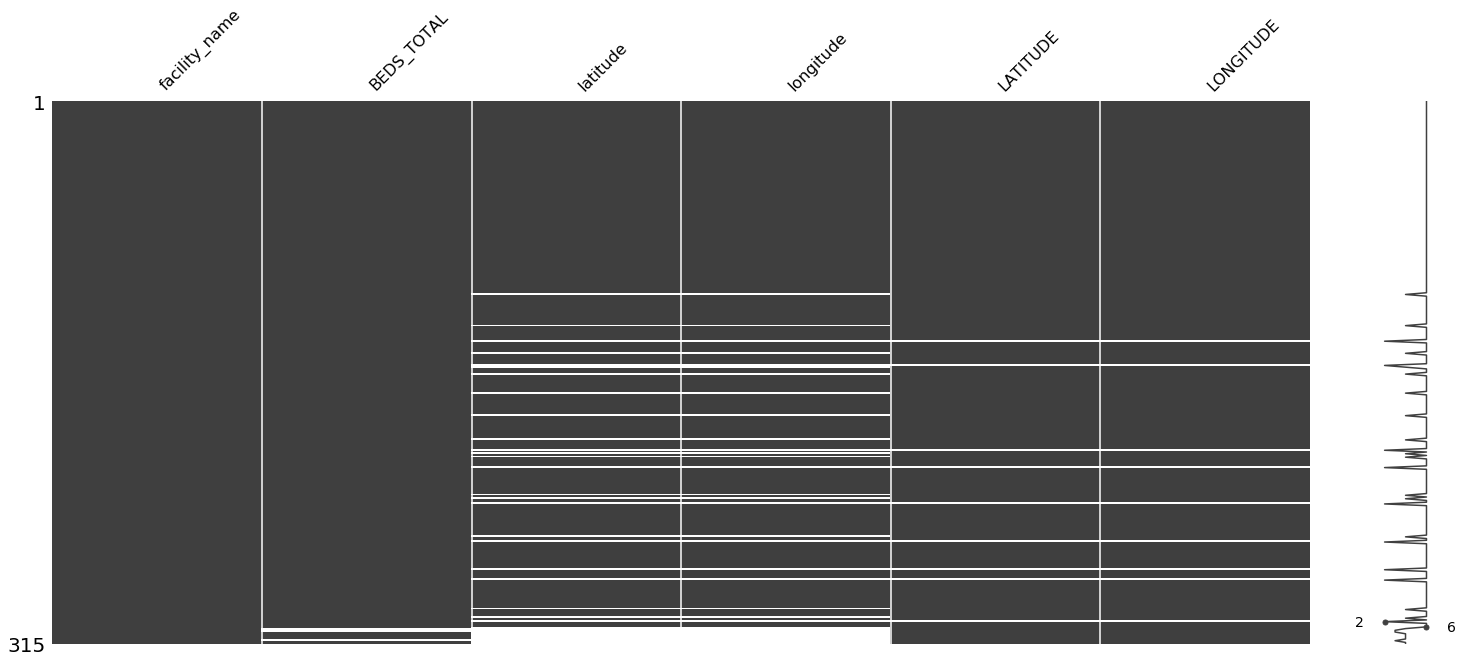

In [77]:
import missingno as msno

msno.matrix(complete.reset_index()[['facility_name', 'BEDS_TOTAL', 'latitude', 'longitude', 'LATITUDE', 'LONGITUDE']])

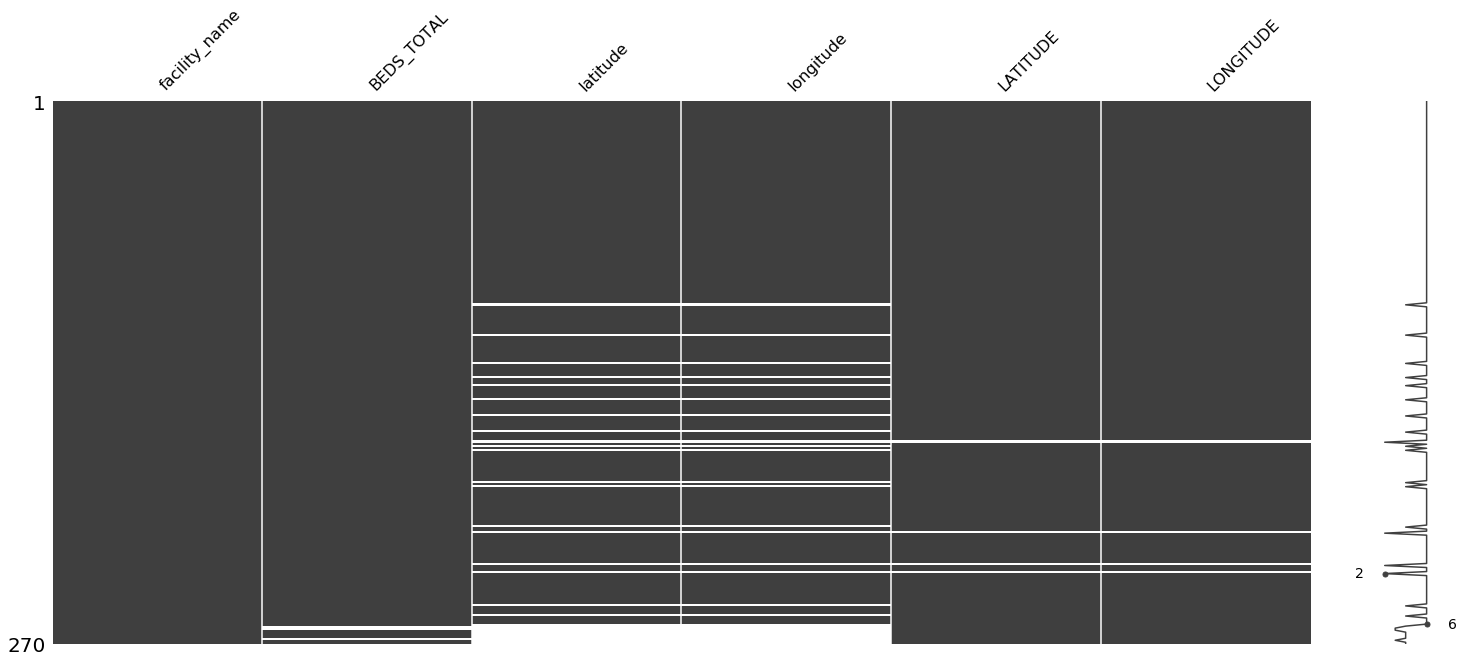

In [78]:
msno.matrix(complete_no_hosp.reset_index()[['facility_name', 'BEDS_TOTAL', 'latitude', 'longitude', 'LATITUDE', 'LONGITUDE']])

---
# Map BC and LTCs


In [63]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [64]:
street_map = gpd.read_file('../data/bc-health-authorities.geojson')

In [79]:
# with gov lat/lon data
geometry = [Point(xy) for xy in zip(complete.LATITUDE, complete.LONGITUDE)]
crs = {'init' : 'EPSG:4326'} # coordinate ref system


geo_df = gpd.GeoDataFrame(complete,
                         crs = crs,
                         geometry = geometry)

geo_df[['outbreak_status','POSTAL', 'LATITUDE', 'LONGITUDE', 'geometry']].head()

#-----------------------------------------------------------

# with gov lat/lon data + HOSPITALS
# geometry = [Point(xy) for xy in zip(complete_no_hosp.LATITUDE, complete_no_hosp.LONGITUDE)]
# crs = {'init' : 'EPSG:4326'} # coordinate ref system



# geo_df = gpd.GeoDataFrame(complete_no_hosp,
#                          crs = crs,
#                          geometry = geometry)

# geo_df[['outbreak_status','POSTAL', 'LATITUDE', 'LONGITUDE', 'geometry']].head()

#-----------------------------------------------------------

# # with OSM lat/lon data
# geometry = [Point(xy) for xy in zip(ltc_odhf3.latitude, ltc_odhf3.longitude)]
# crs = {'init' : 'EPSG:4326'} # coordinate ref system



# geo_df = gpd.GeoDataFrame(ltc_odhf3,
#                          crs = crs,
#                          geometry = geometry)

# geo_df[['facility_name', 'outbreak_status','POSTAL', 'latitude', 'longitude', 'geometry']].head()

//anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,outbreak_status,POSTAL,LATITUDE,LONGITUDE,geometry
facility_name,,,,,
langley lodge,yes,V3A5M9,49.101567,-122.657303,POINT (49.102 -122.657)
lynn valley care centre,yes,V7J1Z8,49.334077,-123.044696,POINT (49.334 -123.045)
holy family hospital,yes,V5P3L6,49.212510,-123.073086,POINT (49.213 -123.073)
haro park centre,yes,V6E3Y5,49.285628,-123.128450,POINT (49.286 -123.128)
royal arch masonic home,yes,V5S4C7,49.213533,-123.028804,POINT (49.214 -123.029)


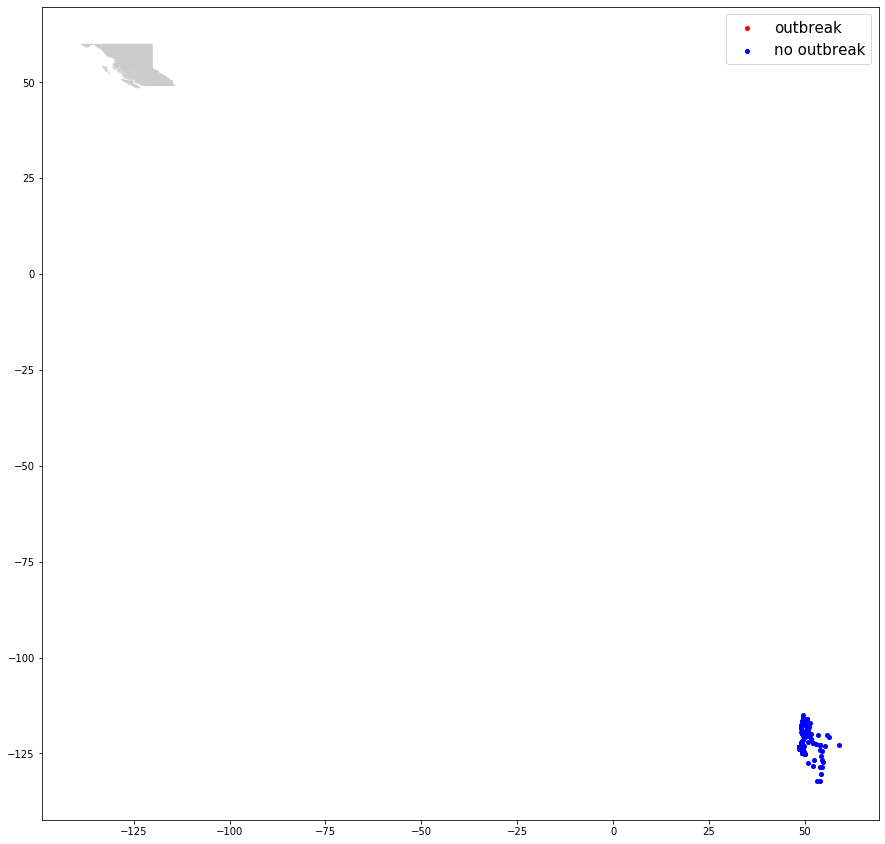

In [80]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
            
geo_df[geo_df['outbreak_status'] == 'yes'].plot(ax = ax, markersize = 16,
                                               color = 'red', marker = 'o',
                                               label = "outbreak")
geo_df[geo_df['outbreak_status'] == 'no'].plot(ax = ax, markersize = 16,
                                               color = 'blue', marker = 'o',
                                               label = "no outbreak")
plt.legend(prop={'size' : 15})

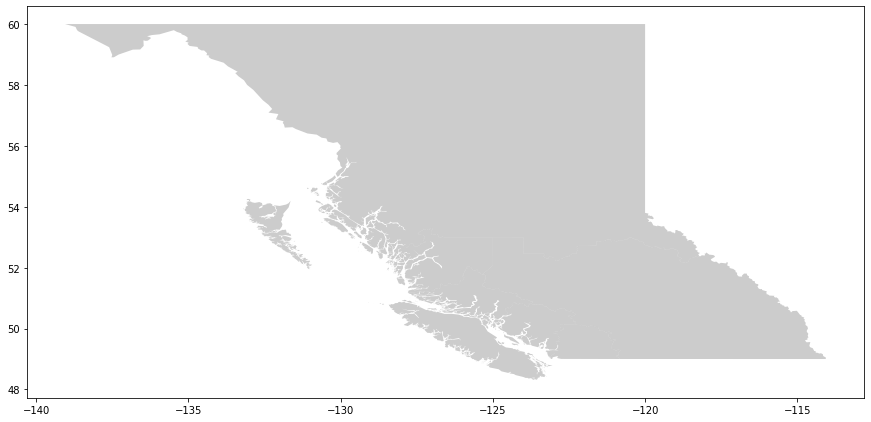

In [81]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

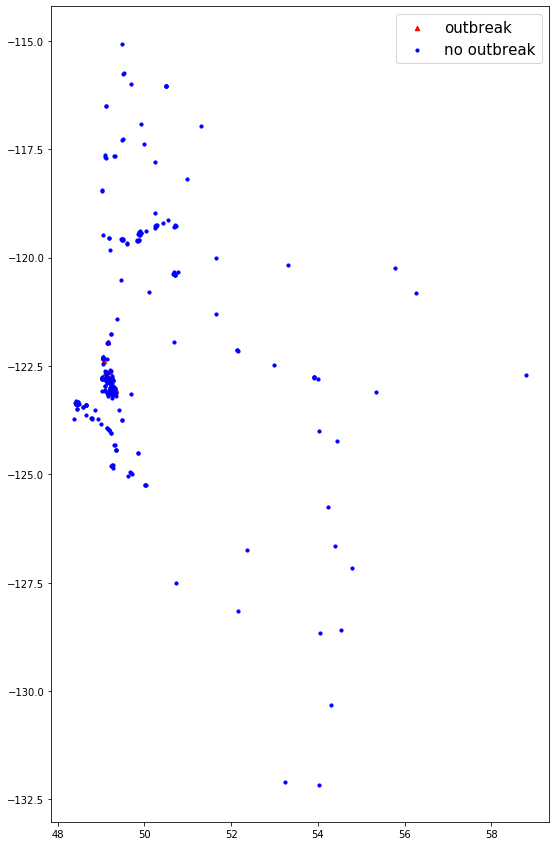

In [82]:
fig,ax = plt.subplots(figsize = (15,15))            
geo_df[geo_df['outbreak_status'] == 'yes'].plot(ax = ax, markersize = 20,
                                               color = 'red', marker = '^',
                                               label = "outbreak")
geo_df[geo_df['outbreak_status'] == 'no'].plot(ax = ax, markersize = 10,
                                               color = 'blue', marker = 'o',
                                               label = "no outbreak")
plt.legend(prop={'size' : 15})